# Pandas: Exploratory Data Analysis (Dinning_Tips_EDA)

In [371]:
import numpy as np
import pandas as pd
import os

In [372]:
# Reading in CSV file
print(os.getcwd())
print(os.listdir())
print(os.listdir('data'))

C:\Users\patri\Development\eda_projects_practice\working_folder\03-Pandas
['.ipynb_checkpoints', 'data', 'Dining_Tips_EDA.ipynb', 'Pandas.ipynb', 'Pandas_Practice2.ipynb']
['hotel_booking_data.csv', 'movie_scores.csv', 'mpg.csv', 'RetailSales_BeerWineLiquor.csv', 'Sales_Funnel_CRM.csv', 'tips.csv']


In [373]:
# csv read (use tab to see other format options)
# Note: Payer name, CC number and Payment ID are fictional data values.
#       The remainder of the data is actual data recorded by single waiter
#       recorded over time.
df = pd.read_csv('data\\tips.csv')
df

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,9.68,Michael Avila,5296068606052842,Sat2657
240,27.18,2.00,Female,Yes,Sat,Dinner,2,13.59,Monica Sanders,3506806155565404,Sat1766
241,22.67,2.00,Male,Yes,Sat,Dinner,2,11.34,Keith Wong,6011891618747196,Sat3880
242,17.82,1.75,Male,No,Sat,Dinner,2,8.91,Dennis Dixon,4375220550950,Sat17


In [374]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size',
       'price_per_person', 'Payer Name', 'CC Number', 'Payment ID'],
      dtype='object')

#### Change spaces in column names to underscore for future database import

In [375]:
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size',
       'price_per_person', 'Payer_Name', 'CC_Number', 'Payment_ID'],
      dtype='object')

In [376]:
df.index

RangeIndex(start=0, stop=244, step=1)

In [377]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer_Name,CC_Number,Payment_ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251


In [378]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer_Name,CC_Number,Payment_ID
239,29.03,5.92,Male,No,Sat,Dinner,3,9.68,Michael Avila,5296068606052842,Sat2657
240,27.18,2.00,Female,Yes,Sat,Dinner,2,13.59,Monica Sanders,3506806155565404,Sat1766
241,22.67,2.00,Male,Yes,Sat,Dinner,2,11.34,Keith Wong,6011891618747196,Sat3880
242,17.82,1.75,Male,No,Sat,Dinner,2,8.91,Dennis Dixon,4375220550950,Sat17
243,18.78,3.00,Female,No,Thur,Dinner,2,9.39,Michelle Hardin,3511451626698139,Thur672


In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_bill        244 non-null    float64
 1   tip               244 non-null    float64
 2   sex               244 non-null    object 
 3   smoker            244 non-null    object 
 4   day               244 non-null    object 
 5   time              244 non-null    object 
 6   size              244 non-null    int64  
 7   price_per_person  244 non-null    float64
 8   Payer_Name        244 non-null    object 
 9   CC_Number         244 non-null    int64  
 10  Payment_ID        244 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 21.1+ KB


In [380]:
np.iinfo(np.int8).max

127

In [381]:
print(df['day'].unique())
print(df['time'].unique())
print(df['sex'].unique())
print(df['smoker'].unique())
print(df['size'].unique())

['Sun' 'Sat' 'Thur' 'Fri']
['Dinner' 'Lunch']
['Female' 'Male']
['No' 'Yes']
[2 3 4 1 6 5]


#### Changes to make on DataFrame
- total_bill, tip, price_per_person columns can be float 16 bit
    - will leave as float64 due to small memory usage,
    - benifit of rounding \$, and
    - rounding and calculation errors possible introduced with half precision floats
- size can be int 8 bit (assumes groups much less than 127)
- CC Number can be string object (Non-ordered, ID number)
- sex as given can be binary/categorical
- smoker can be bool
- day as datetime/weekday or weekday categorical
- time as categorical
- add tip percent of total bill column


In [382]:
# Adding tip percent of total bill
df['tip_percent'] = (df['tip'] / df ['total_bill'] * 100).round(1)

In [383]:
df.drop('CC_Number', axis=1).describe().round(2)

,total_bill,tip,size,price_per_person,tip_percent
count,244.00,244.00,244.00,244.00,244.00
mean,19.79,3.00,2.57,7.89,16.08
std,8.90,1.38,0.95,2.91,6.11
min,3.07,1.00,1.00,2.88,3.60
25%,13.35,2.00,2.00,5.80,12.88
50%,17.80,2.90,2.00,7.26,15.45
75%,24.13,3.56,3.00,9.39,19.12
max,50.81,10.00,6.00,20.27,71.00


In [384]:
df.drop('CC_Number', axis=1).describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.79,8.90,3.07,13.35,17.80,24.13,50.81
tip,244.0,3.00,1.38,1.00,2.00,2.90,3.56,10.00
size,244.0,2.57,0.95,1.00,2.00,2.00,3.00,6.00
price_per_person,244.0,7.89,2.91,2.88,5.80,7.26,9.39,20.27
tip_percent,244.0,16.08,6.11,3.60,12.88,15.45,19.12,71.00


#### Observations from descriptive statistics
- There are 244 values for all columns (no missing values).
- total_bill, size and price_per_person have some right skewness.
- tip has some left skewness.
- tip percentage median is around 15% with
    - a maximum value of 71%
    - a minimum value of 3.6%
- 75% of the total_bill are below \\$24.13 and tips below \\$3.56 (approx 15% of 24.13).
- Median party size is 2 with mean between 2 to 3.
- Variation for total_bill and tip are higher than variations in size and price_per_person.
- Minimum total_bill is just over \\$3 and minimum tip is \\$1.
- Maximum total_bill is just under \\$51, maximum tip is \\$10 and maximum group size is 6.
- CC column is irrelevant in description and is not included.

In [385]:
print('10 Highest Tip Percentages')
(
    df.loc[df['tip_percent'] > df['tip_percent'].
           quantile(0.75)].
           sort_values(by='tip_percent', ascending = False).head(10)
)

10 Highest Tip Percentages


,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer_Name,CC_Number,Payment_ID,tip_percent
172,7.25,5.15,Male,Yes,Sun,Dinner,2,3.62,Larry White,30432617123103,Sun9209,71.0
178,9.60,4.00,Female,Yes,Sun,Dinner,2,4.80,Melanie Gray,4211808859168,Sun4598,41.7
67,3.07,1.00,Female,Yes,Sat,Dinner,1,3.07,Tiffany Brock,4359488526995267,Sat3455,32.6
232,11.61,3.39,Male,No,Sat,Dinner,2,5.80,James Taylor,6011482917327995,Sat2124,29.2
183,23.17,6.50,Male,Yes,Sun,Dinner,4,5.79,Dr. Michael James,4718501859162,Sun6059,28.1
109,14.31,4.00,Female,Yes,Sat,Dinner,2,7.16,Amanda Anderson,375638820334211,Sat2614,28.0
149,7.51,2.00,Male,No,Thur,Lunch,2,3.76,Daniel Robbins,4823139288341889,Thur6321,26.6
93,16.32,4.30,Female,Yes,Fri,Dinner,2,8.16,Natalie Nguyen,5181236182893396,Fri6963,26.3
221,13.42,3.48,Female,Yes,Fri,Lunch,2,6.71,Leslie Kaufman,379437981958785,Fri7511,25.9
51,10.29,2.60,Female,No,Sun,Dinner,2,5.14,Jessica Ibarra,4999759463713,Sun4474,25.3


In [386]:
print('10 Lowest Tip Percentages')
(
    df.loc[df['tip_percent'] < df['tip_percent'].
           quantile(0.25)].
           sort_values(by='tip_percent').head(10)
)

10 Lowest Tip Percentages


,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer_Name,CC_Number,Payment_ID,tip_percent
237,32.83,1.17,Male,Yes,Sat,Dinner,2,16.42,Thomas Brown,4284722681265508,Sat2929,3.6
102,44.30,2.50,Female,Yes,Sat,Dinner,3,14.77,Heather Cohen,379771118886604,Sat6240,5.6
57,26.41,1.50,Female,No,Sat,Dinner,2,13.20,Melody Simon,4745394421258160,Sat8980,5.7
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,5.9
187,30.46,2.00,Male,Yes,Sun,Dinner,5,6.09,David Barrett,4792882899700988,Sun9987,6.6
210,30.06,2.00,Male,Yes,Sat,Dinner,3,10.02,Shawn Mendoza,30184049218122,Sat8361,6.7
48,28.55,2.05,Male,No,Sun,Dinner,3,9.52,Austin Fisher,6011481668986587,Sun4142,7.2
146,18.64,1.36,Female,No,Thur,Lunch,3,6.21,Kelly Estrada,60463302327,Thur3941,7.3
240,27.18,2.00,Female,Yes,Sat,Dinner,2,13.59,Monica Sanders,3506806155565404,Sat1766,7.4
184,40.55,3.00,Male,Yes,Sun,Dinner,2,20.27,Stephen Cox,3547798222044029,Sun5140,7.4


Based on the observations from the two tables above, the higher the total_bill and price_per_person the less the tip percentage seems to be. Further analysis should be performed on this possible pattern.

The 3.6%, 71% and 41.7% tips are possible outliers that may need to be removed before any machine learning algorithms are applied.

<AxesSubplot:xlabel='total_bill', ylabel='tip_percent'>

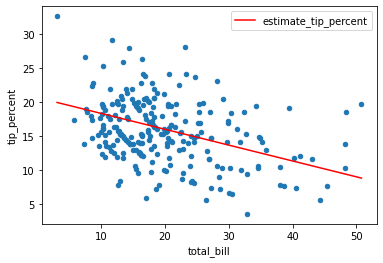

In [387]:
Beta = np.polyfit(df.total_bill, df.tip_percent, deg=1)
min_max_bill = np.array([df.total_bill.min(), df.total_bill.max()])
reg_est = Beta[0] * min_max_bill + Beta[1]
temp_df = pd.DataFrame({'total_bill': min_max_bill,
                        'estimate_tip_percent': reg_est})

ax = df[df['tip_percent'] < 41].plot.scatter(x='total_bill', y='tip_percent')
temp_df.plot.line(ax=ax, x='total_bill', y = 'estimate_tip_percent', c= 'r' )

In [388]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer_Name,CC_Number,Payment_ID,tip_percent
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,5.9
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,16.1
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458,16.7
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260,14.0
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251,14.7


In [389]:
# Restructure data
float_cols = ['total_bill', 'tip', 'price_per_person']
bool_map = {'Yes':True, 'yes':True, 'No':False, 'no':False}

# df[float_cols] = np.round(df[float_cols].astype('float16'), 2)
df['size'] = df['size'].astype('int8')
df['CC_Number'] = df['CC_Number'].astype('string')
df['smoker'] = df['smoker'].map(bool_map).astype('bool')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_bill        244 non-null    float64
 1   tip               244 non-null    float64
 2   sex               244 non-null    object 
 3   smoker            244 non-null    bool   
 4   day               244 non-null    object 
 5   time              244 non-null    object 
 6   size              244 non-null    int8   
 7   price_per_person  244 non-null    float64
 8   Payer_Name        244 non-null    object 
 9   CC_Number         244 non-null    string 
 10  Payment_ID        244 non-null    object 
 11  tip_percent       244 non-null    float64
dtypes: bool(1), float64(4), int8(1), object(5), string(1)
memory usage: 19.7+ KB


In [390]:
df.head(10)

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer_Name,CC_Number,Payment_ID,tip_percent
0,16.99,1.01,Female,False,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,5.9
1,10.34,1.66,Male,False,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,16.1
2,21.01,3.50,Male,False,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458,16.7
3,23.68,3.31,Male,False,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260,14.0
4,24.59,3.61,Female,False,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251,14.7
5,25.29,4.71,Male,False,Sun,Dinner,4,6.32,Erik Smith,213140353657882,Sun9679,18.6
6,8.77,2.00,Male,False,Sun,Dinner,2,4.38,Kristopher Johnson,2223727524230344,Sun5985,22.8
7,26.88,3.12,Male,False,Sun,Dinner,4,6.72,Robert Buck,3514785077705092,Sun8157,11.6
8,15.04,1.96,Male,False,Sun,Dinner,2,7.52,Joseph Mcdonald,3522866365840377,Sun6820,13.0
9,14.78,3.23,Male,False,Sun,Dinner,2,7.39,Jerome Abbott,3532124519049786,Sun3775,21.9


### Totals by Weekday

In [391]:
# Day of week sums
day_of_week_order = ['Thur', 'Fri', 'Sat', 'Sun']
day_of_week_totals = (
                        df[['day', 'size', 'total_bill', 'tip']].
                            groupby('day').
                            sum().
                            reindex(day_of_week_order).
                            reset_index()
                     )
day_of_week_totals['tip_per_person'] = (day_of_week_totals['tip'] / day_of_week_totals['size']).round(2)
day_of_week_totals

,day,size,total_bill,tip,tip_per_person
0,Thur,152.0,1096.33,171.83,1.13
1,Fri,40.0,325.88,51.96,1.30
2,Sat,219.0,1778.40,260.40,1.19
3,Sun,216.0,1627.16,247.39,1.15


In [392]:
df[['total_bill', 'day']].groupby('day').count().rename(columns={'total_bill':'Tables Served'}).reset_index()

,day,Tables Served
0,Fri,19
1,Sat,87
2,Sun,76
3,Thur,62


<AxesSubplot:xlabel='day'>

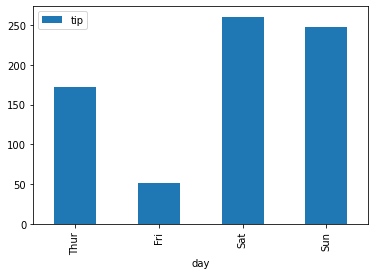

In [393]:
day_of_week_totals[['day', 'tip']].plot(kind='bar', x='day', y='tip')

#### Observations from Totals by Day of Week
- Saturday has the highest number of tables served, patrons (size), revenue (total_bill) and tips. Though Sunday is not significantly different.
- Friday has the least number of tables served, patrons, size and tip but the highest tip per person.
    - 9% higher than Saturday.
    - 13% higher than Sunday.
    - 15% higher than Thursday.
    This may be due to working a shorter shift during peak tip time (happy hour).

#### Evaluating using payment ID as index (primary key candidate)

In [394]:
# evaluate payment ID as unique index
df.loc[df['Payment_ID'].duplicated() == True]

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer_Name,CC_Number,Payment_ID,tip_percent
205,16.47,3.23,Female,True,Thur,Lunch,3,5.49,Carly Reyes,4787787236486,Thur8084,19.6


In [395]:
# duplicate id found
df[df['Payment_ID'] == 'Thur8084']

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer_Name,CC_Number,Payment_ID,tip_percent
118,12.43,1.80,Female,False,Thur,Lunch,2,6.22,Dr. Caroline Tucker,502047186908,Thur8084,14.5
205,16.47,3.23,Female,True,Thur,Lunch,3,5.49,Carly Reyes,4787787236486,Thur8084,19.6


#### Payment ID 'Thur8084' is a duplicate key. Will check if it is incremental.

In [396]:
# check to see if payment id is incremental
df.loc[df['Payment_ID'].str.startswith('Thur80')]

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer_Name,CC_Number,Payment_ID,tip_percent
118,12.43,1.80,Female,False,Thur,Lunch,2,6.22,Dr. Caroline Tucker,502047186908,Thur8084,14.5
119,24.08,2.92,Female,False,Thur,Lunch,4,6.02,Melanie Jordan,676212062720,Thur8063,12.1
205,16.47,3.23,Female,True,Thur,Lunch,3,5.49,Carly Reyes,4787787236486,Thur8084,19.6


Payments are not incremental. Will use decimals to distinguish duplicates to retain original payment id incase of disputes/errors. Recommend switching to incremental for Payment ID generation.

In [397]:
# Rename payment id for Carly Reyes to Thur8084.1
df.at[118, 'Payment_ID'] = 'Thur8084.0'
df.at[205, 'Payment_ID'] = 'Thur8084.1'

Verifying changes

In [398]:
df.iloc[118]

total_bill                        12.43
tip                                 1.8
sex                              Female
smoker                            False
day                                Thur
time                              Lunch
size                                  2
price_per_person                   6.22
Payer_Name          Dr. Caroline Tucker
CC_Number                  502047186908
Payment_ID                   Thur8084.0
tip_percent                        14.5
Name: 118, dtype: object

In [399]:
df.iloc[205]

total_bill                  16.47
tip                          3.23
sex                        Female
smoker                       True
day                          Thur
time                        Lunch
size                            3
price_per_person             5.49
Payer_Name            Carly Reyes
CC_Number           4787787236486
Payment_ID             Thur8084.1
tip_percent                  19.6
Name: 205, dtype: object

In [400]:
df.loc[df['Payment_ID'].duplicated() == True]

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer_Name,CC_Number,Payment_ID,tip_percent


#### Setting Payment ID to Index (future Primary key candidate)

In [401]:
df = df.set_index('Payment_ID')

In [402]:
# Verify index change
df.loc[['Thur8084.0', 'Thur8084.1']]

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer_Name,CC_Number,tip_percent
Payment_ID,,,,,,,,,,,
Thur8084.0,12.43,1.80,Female,False,Thur,Lunch,2,6.22,Dr. Caroline Tucker,502047186908,14.5
Thur8084.1,16.47,3.23,Female,True,Thur,Lunch,3,5.49,Carly Reyes,4787787236486,19.6


### Comparison Filters

In [403]:
(
    df[df['tip_percent'] > 15].
        groupby('day')[['tip_percent']].
        count().
        rename(columns={'tip_percent': 'Tips above 15%'})
)

,Tips above 15%
day,
Fri,11
Sat,44
Sun,43
Thur,35


In [404]:
bill_mean = df['total_bill'].mean()
bills_above_mean = (
        df[df['total_bill'] > bill_mean].
        groupby('day')[['total_bill']].
        count().
        rename(columns={'total_bill': 'Bills Above Average Bill'}).
        reset_index().
        set_index('day')
)
bills_above_mean

,Bills Above Average Bill
day,
Fri,6
Sat,39
Sun,37
Thur,17


In [405]:
bill_mean_tips_above_15 = (
        df[(df['total_bill'] > bill_mean) & (df['tip_percent'] > 15)].
        groupby('day')[['total_bill']].
        count().
        rename(columns={'total_bill': 'Bills Above Average Bill and Tip Above 15%'}).
        reset_index().
        set_index('day')
)
bill_mean_tips_above_15

,Bills Above Average Bill and Tip Above 15%
day,
Fri,1
Sat,17
Sun,16
Thur,6


In [406]:
temp_df = bills_above_mean.join(bill_mean_tips_above_15, on = 'day').reset_index().set_index('day')
temp_df

,Bills Above Average Bill,Bills Above Average Bill and Tip Above 15%
day,,
Fri,6,1
Sat,39,17
Sun,37,16
Thur,17,6


<AxesSubplot:xlabel='day'>

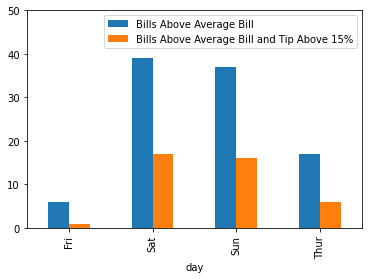

In [407]:
(
    temp_df.
    plot(y=["Bills Above Average Bill", "Bills Above Average Bill and Tip Above 15%" ],
         kind="bar", ylim = (0, 50))
)

In [408]:
temp_df['Percent Above 15% Tip'] = (
    round(
        (100 * temp_df['Bills Above Average Bill and Tip Above 15%'] / 
         temp_df['Bills Above Average Bill']),
        2)
)
temp_df

,Bills Above Average Bill,Bills Above Average Bill and Tip Above 15%,Percent Above 15% Tip
day,,,
Fri,6,1,16.67
Sat,39,17,43.59
Sun,37,16,43.24
Thur,17,6,35.29


In [409]:
temp2_df = (
        (
            df[df['total_bill'] <= bill_mean].
                groupby('day')[['total_bill']].
                count().
                rename(columns={'total_bill': 'Bills Below Average Bill'}).
                reset_index().
                set_index('day')
        ).join(
            (
                df[(df['total_bill'] <= bill_mean) & (df['tip_percent'] > 15)].
                    groupby('day')[['total_bill']].
                    count().
                    rename(columns={'total_bill': 'Bills Below Average Bill and Tip Above 15%'}).
                    reset_index().
                    set_index('day'))
        )
)
temp2_df

,Bills Below Average Bill,Bills Below Average Bill and Tip Above 15%
day,,
Fri,13,10
Sat,48,27
Sun,39,27
Thur,45,29


<AxesSubplot:xlabel='day'>

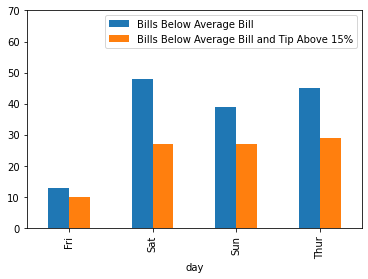

In [410]:
(
    temp2_df.
    plot(y=["Bills Below Average Bill", "Bills Below Average Bill and Tip Above 15%" ],
         kind="bar", ylim = (0, 70))
)

In [411]:
temp2_df['Percent Above 15% Tip Below Mean Bill'] = (
    round(
        (100 * temp2_df['Bills Below Average Bill and Tip Above 15%'] / 
         temp2_df['Bills Below Average Bill']),
        2)
)
temp2_df

,Bills Below Average Bill,Bills Below Average Bill and Tip Above 15%,Percent Above 15% Tip Below Mean Bill
day,,,
Fri,13,10,76.92
Sat,48,27,56.25
Sun,39,27,69.23
Thur,45,29,64.44


<AxesSubplot:title={'center':'Percent tip based on above and below mean bill\n'}, xlabel='day', ylabel='Number of Occurences'>

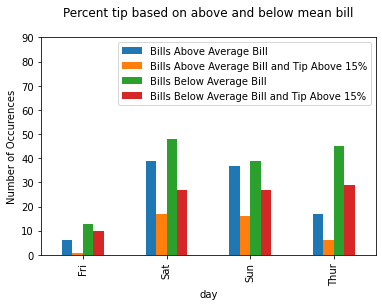

In [427]:
(
    temp_df.
    join(temp2_df[['Bills Below Average Bill', 'Bills Below Average Bill and Tip Above 15%']],
         on = 'day')
).plot(kind='bar', 
       y = ['Bills Above Average Bill', 
            'Bills Above Average Bill and Tip Above 15%',
            'Bills Below Average Bill',
            'Bills Below Average Bill and Tip Above 15%'], 
       ylim = (0, 90),
       ylabel = 'Number of Occurences',
       title = 'Percent tip based on above and below mean bill\n',
      )

#### Percent tip based on above and below mean bill
Though the tip dollar amount is not necessarily greater, tables with bills below the average bill tend to give a higher percent tip.